<a href="https://colab.research.google.com/github/BaskaranV15/basic-nn-model/blob/main/Deep_learning_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd


auth.authenticate_user()
creds, _ = default()
gc1 = gspread.authorize(creds)

worksheet = gc1.open('mymldata').sheet1

rows = worksheet.get_all_values()
creds, _ = default()
gc1 = gspread.authorize(creds)

df = pd.DataFrame(rows[1:], columns=rows[0])
df = df.astype({'input':'float'})
df.head()

,input,output
0,1.0,11
1,2.0,12
2,3.0,13
3,4.0,14
4,5.0,15


In [4]:
worksheet5 = gc1.open('mymldata').sheet1
rows = worksheet5.get_all_values()

In [5]:
df = pd.DataFrame(rows[1:], columns=rows[0])
df = df.astype({'input':'float'})
df = df.astype({'output':'float'})
df.head()

,input,output
0,1.0,11.0
1,2.0,12.0
2,3.0,13.0
3,4.0,14.0
4,5.0,15.0


In [ ]:
y

In [ ]:
X.shape

In [ ]:
y.shape


In [7]:
X=df[['input']].values
y=df[['output']].values

In [8]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=33)

In [9]:
scaler=MinMaxScaler()

In [10]:
x_train1=scaler.fit_transform(x_train)

In [11]:
model_brain=Sequential([
    Dense(units=3,activation='relu',input_shape=[1]),
    Dense(units=3,activation='relu'),
    Dense(units=1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model_brain.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 3)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22 (88.00 B)

 Trainable params: 22 (88.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
model_brain.compile(optimizer='Adam',loss='mse')

In [14]:
dir(tensorflow.keras.optimizers)

['Adadelta',
 'Adafactor',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'Ftrl',
 'Lion',
 'LossScaleOptimizer',
 'Nadam',
 'Optimizer',
 'RMSprop',
 'SGD',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'deserialize',
 'get',
 'legacy',
 'schedules',
 'serialize']

In [15]:
model_brain.fit(x_train1,y_train,epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 690.8047
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 690.5829
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 690.3607
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 690.1381
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 689.9152


In [19]:
loss_df=pd.DataFrame(model_brain.histroy.histroy)

AttributeError: 'Sequential' object has no attribute 'histroy'

In [20]:
loss_df = pd.DataFrame(model_brain.history.history) # Correct the typo from 'histroy' to 'history'

<Axes: >

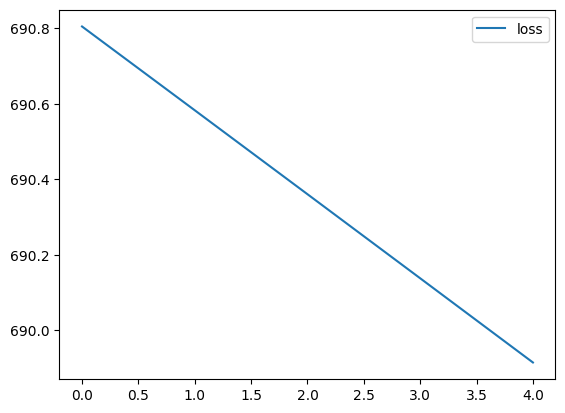

In [21]:
loss_df.plot()

In [22]:
x_test1=scaler.transform(x_test)

In [23]:
model_brain.evaluate(x_test1,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 734.5920


734.5919799804688

In [24]:
x1_n=[[6]]

In [25]:
x1_n_1=scaler.transform(x1_n)

In [30]:
model_brain.predict(x1_n_1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[0.10931972]], dtype=float32)